# Text Mining and Sentiment Analysis with NLTK and pandas in Python



## Data import

In [267]:
import pandas as pd

# Import some Tweets from Barack Obama 
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/twitter-tweepy/main/tweets-obama.csv")
df.head(3)

,Unnamed: 0,created_at,id,author_id,text
0,0,2022-05-16T21:24:35.000Z,1526312680226799618,813286,"It’s despicable, it’s dangerous — and it needs..."
1,1,2022-05-16T21:24:34.000Z,1526312678951641088,813286,We need to repudiate in the strongest terms th...
2,2,2022-05-16T21:24:34.000Z,1526312677521428480,813286,This weekend’s shootings in Buffalo offer a tr...


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         5 non-null      int64 
 1   created_at         5 non-null      object
 2   id                 5 non-null      int64 
 3   author_id          5 non-null      int64 
 4   text               5 non-null      object
 5   text_token         5 non-null      object
 6   text_string        5 non-null      object
 7   text_string_fdist  5 non-null      object
 8   text_string_lem    5 non-null      object
 9   is_equal           5 non-null      bool  
dtypes: bool(1), int64(3), object(6)
memory usage: 493.0+ bytes


## Data transformation

In [268]:
df['text'] = df['text'].astype(str).str.lower()
df.head(3)

,Unnamed: 0,created_at,id,author_id,text
0,0,2022-05-16T21:24:35.000Z,1526312680226799618,813286,"it’s despicable, it’s dangerous — and it needs..."
1,1,2022-05-16T21:24:34.000Z,1526312678951641088,813286,we need to repudiate in the strongest terms th...
2,2,2022-05-16T21:24:34.000Z,1526312677521428480,813286,this weekend’s shootings in buffalo offer a tr...


## Tokenization

- Install [NLTK](https://anaconda.org/anaconda/nltk): 

```bash
conda install -c anaconda nltk
```


- We use NLTK's [RegexpTokenizer](https://www.nltk.org/_modules/nltk/tokenize/regexp.html) to perform [tokenization](https://en.wikipedia.org/wiki/Lexical_analysis#Tokenization) in combination with regular expressions. 

- To learn more about regular expressions ("regexp"), visit the following sites:


- [regular expression basics](https://www.w3schools.com/python/python_regex.asp).
- [interactive regular expressions tool](https://regex101.com/)

- `\w+` matches Unicode word characters with one or more occurrences; 
- this includes most characters that can be part of a word in any language, as well as numbers and the underscore.

In [269]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['text_token']=df['text'].apply(regexp.tokenize)
df.head(3)


,Unnamed: 0,created_at,id,author_id,text,text_token
0,0,2022-05-16T21:24:35.000Z,1526312680226799618,813286,"it’s despicable, it’s dangerous — and it needs...","[it, s, despicable, it, s, dangerous, and, it,..."
1,1,2022-05-16T21:24:34.000Z,1526312678951641088,813286,we need to repudiate in the strongest terms th...,"[we, need, to, repudiate, in, the, strongest, ..."
2,2,2022-05-16T21:24:34.000Z,1526312677521428480,813286,this weekend’s shootings in buffalo offer a tr...,"[this, weekend, s, shootings, in, buffalo, off..."


## Stopwords

- Stop words are words in a stop list which are dropped before analysing natural language data since they don't contain valuable information (like "will", "and", "or", "has", ...).

In [270]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jankirenz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [271]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)

- We use a [lambda function](https://www.w3schools.com/python/python_lambda.asp) to remove the stopwords:

In [272]:
# Remove stopwords
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

,Unnamed: 0,created_at,id,author_id,text,text_token
0,0,2022-05-16T21:24:35.000Z,1526312680226799618,813286,"it’s despicable, it’s dangerous — and it needs...","[despicable, dangerous, needs, stop, co, 0ch2z..."
1,1,2022-05-16T21:24:34.000Z,1526312678951641088,813286,we need to repudiate in the strongest terms th...,"[need, repudiate, strongest, terms, politician..."
2,2,2022-05-16T21:24:34.000Z,1526312677521428480,813286,this weekend’s shootings in buffalo offer a tr...,"[weekend, shootings, buffalo, offer, tragic, r..."


## Remove infrequent words

- We first change the format of `text_token` to strings and keep only words which are longer than 2 letters

In [273]:
df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [274]:
df[['text', 'text_token', 'text_string']].head()

,text,text_token,text_string
0,"it’s despicable, it’s dangerous — and it needs...","[despicable, dangerous, needs, stop, co, 0ch2z...",despicable dangerous needs stop 0ch2zosmhb
1,we need to repudiate in the strongest terms th...,"[need, repudiate, strongest, terms, politician...",need repudiate strongest terms politicians med...
2,this weekend’s shootings in buffalo offer a tr...,"[weekend, shootings, buffalo, offer, tragic, r...",weekend shootings buffalo offer tragic reminde...
3,i’m proud to announce the voyager scholarship ...,"[proud, announce, voyager, scholarship, friend...",proud announce voyager scholarship friend bche...
4,"across the country, americans are standing up ...","[across, country, americans, standing, abortio...",across country americans standing abortion rig...


- Create a list of all words

In [275]:
all_words = ' '.join([word for word in df['text_string']])

- Tokenize `all_words`

In [276]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

- Create a frequency distribution which records the number of times each word has occurred:

In [277]:
fdist = FreqDist(tokenized_words)
fdist

FreqDist({'need': 2, 'americans': 2, 'proud': 2, 'despicable': 1, 'dangerous': 1, 'needs': 1, 'stop': 1, '0ch2zosmhb': 1, 'repudiate': 1, 'strongest': 1, ...})

- Now we can use our `fdist` dictionary to drop words which occur less than a certain amount of times (usually we use a value of 3 or 4).
- Since our dataset is really small, we don't filter out any words and set the value to greater or equal to 1 (otherwise there are not many words left in this particular dataset) 

In [278]:
df['text_string_fdist'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

In [279]:
df[['text', 'text_token', 'text_string', 'text_string_fdist']].head()

,text,text_token,text_string,text_string_fdist
0,"it’s despicable, it’s dangerous — and it needs...","[despicable, dangerous, needs, stop, co, 0ch2z...",despicable dangerous needs stop 0ch2zosmhb,despicable dangerous needs stop 0ch2zosmhb
1,we need to repudiate in the strongest terms th...,"[need, repudiate, strongest, terms, politician...",need repudiate strongest terms politicians med...,need repudiate strongest terms politicians med...
2,this weekend’s shootings in buffalo offer a tr...,"[weekend, shootings, buffalo, offer, tragic, r...",weekend shootings buffalo offer tragic reminde...,weekend shootings buffalo offer tragic reminde...
3,i’m proud to announce the voyager scholarship ...,"[proud, announce, voyager, scholarship, friend...",proud announce voyager scholarship friend bche...,proud announce voyager scholarship friend bche...
4,"across the country, americans are standing up ...","[across, country, americans, standing, abortio...",across country americans standing abortion rig...,across country americans standing abortion rig...


## Lemmatization

- Next, we perfom [lemmatization](https://en.wikipedia.org/wiki/Lemmatisation).

In [280]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jankirenz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jankirenz/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [281]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df['text_string_lem'] = df['text_string_fdist'].apply(wordnet_lem.lemmatize)

- Note that in some datasets, there are no words to lemmatize. We can check this as follows:

In [282]:
# check if the columns are equal
df['is_equal']= (df['text_string_fdist']==df['text_string_lem'])

In [283]:
# show level count
df.is_equal.value_counts()

True    5
Name: is_equal, dtype: int64

In [286]:
df

,Unnamed: 0,created_at,id,author_id,text,text_token,text_string,text_string_fdist,text_string_lem,is_equal
0,0,2022-05-16T21:24:35.000Z,1526312680226799618,813286,"it’s despicable, it’s dangerous — and it needs...","[despicable, dangerous, needs, stop, co, 0ch2z...",despicable dangerous needs stop 0ch2zosmhb,despicable dangerous needs stop 0ch2zosmhb,despicable dangerous needs stop 0ch2zosmhb,True
1,1,2022-05-16T21:24:34.000Z,1526312678951641088,813286,we need to repudiate in the strongest terms th...,"[need, repudiate, strongest, terms, politician...",need repudiate strongest terms politicians med...,need repudiate strongest terms politicians med...,need repudiate strongest terms politicians med...,True
2,2,2022-05-16T21:24:34.000Z,1526312677521428480,813286,this weekend’s shootings in buffalo offer a tr...,"[weekend, shootings, buffalo, offer, tragic, r...",weekend shootings buffalo offer tragic reminde...,weekend shootings buffalo offer tragic reminde...,weekend shootings buffalo offer tragic reminde...,True
3,3,2022-05-16T13:16:16.000Z,1526189794665107457,813286,i’m proud to announce the voyager scholarship ...,"[proud, announce, voyager, scholarship, friend...",proud announce voyager scholarship friend bche...,proud announce voyager scholarship friend bche...,proud announce voyager scholarship friend bche...,True
4,4,2022-05-14T15:03:07.000Z,1525491905139773442,813286,"across the country, americans are standing up ...","[across, country, americans, standing, abortio...",across country americans standing abortion rig...,across country americans standing abortion rig...,across country americans standing abortion rig...,True


## Word cloud

- Install [wordcloud](https://amueller.github.io/word_cloud/):

```bash
conda install -c conda-forge wordcloud
```

- [Word cloud example gallery](https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery)

In [284]:
all_words_lem = ' '.join([word for word in df['text_string_lem']])

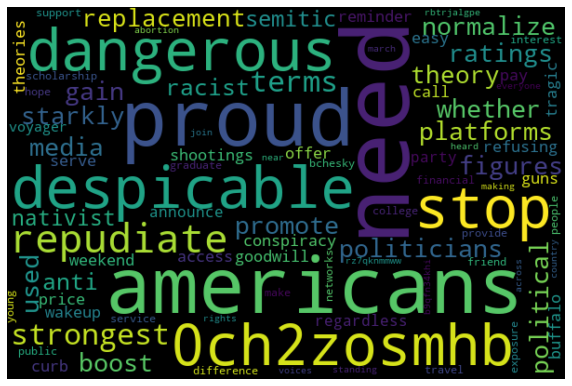

In [285]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

- Different style:

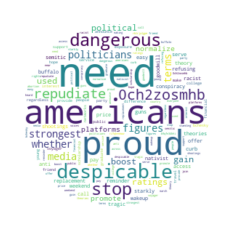

In [288]:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_lem)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

## Frequency distributions

In [289]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/jankirenz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [290]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

### Most common words

In [291]:
fd.most_common(3)

[('need', 2), ('americans', 2), ('proud', 2)]

In [292]:
fd.tabulate(3)

     need americans     proud 
        2         2         2 


### Plot common words

In [293]:
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

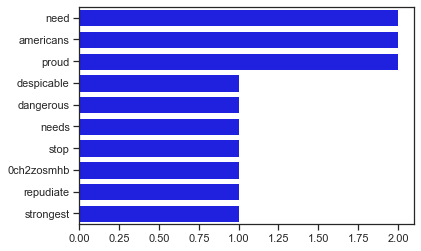

In [294]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [295]:
import plotly.express as px

fig = px.bar(y=fdist.index, x=fdist.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()

### Search specific words

In [298]:
# Show frequency of a specific word
fd["americans"]

2

## Sentiment analysis



### VADER lexicon

- NLTK provides a simple rule-based model for general sentiment analysis called VADER, which stands for "Valence Aware Dictionary and Sentiment Reasoner" (Hutto & Gilbert, 2014).

In [299]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jankirenz/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Sentiment 

### Sentiment Intensity Analyzer

- Initialize an object of `SentimentIntensityAnalyzer` with name "analyzer":

In [300]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

### Polarity scores

- Use the `polarity_scores` method:

In [301]:
df['polarity'] = df['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df.tail(3)

,Unnamed: 0,created_at,id,author_id,text,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity
2,2,2022-05-16T21:24:34.000Z,1526312677521428480,813286,this weekend’s shootings in buffalo offer a tr...,"[weekend, shootings, buffalo, offer, tragic, r...",weekend shootings buffalo offer tragic reminde...,weekend shootings buffalo offer tragic reminde...,weekend shootings buffalo offer tragic reminde...,True,"{'neg': 0.247, 'neu': 0.557, 'pos': 0.195, 'co..."
3,3,2022-05-16T13:16:16.000Z,1526189794665107457,813286,i’m proud to announce the voyager scholarship ...,"[proud, announce, voyager, scholarship, friend...",proud announce voyager scholarship friend bche...,proud announce voyager scholarship friend bche...,proud announce voyager scholarship friend bche...,True,"{'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'comp..."
4,4,2022-05-14T15:03:07.000Z,1525491905139773442,813286,"across the country, americans are standing up ...","[across, country, americans, standing, abortio...",across country americans standing abortion rig...,across country americans standing abortion rig...,across country americans standing abortion rig...,True,"{'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compou..."


### Transform data

In [302]:
# Change data structure
df = pd.concat(
    [df.drop(['Unnamed: 0', 'id', 'author_id', 'polarity'], axis=1), 
     df['polarity'].apply(pd.Series)], axis=1)
df.head(3)

,created_at,text,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound
0,2022-05-16T21:24:35.000Z,"it’s despicable, it’s dangerous — and it needs...","[despicable, dangerous, needs, stop, co, 0ch2z...",despicable dangerous needs stop 0ch2zosmhb,despicable dangerous needs stop 0ch2zosmhb,despicable dangerous needs stop 0ch2zosmhb,True,0.639,0.361,0.000,-0.6486
1,2022-05-16T21:24:34.000Z,we need to repudiate in the strongest terms th...,"[need, repudiate, strongest, terms, politician...",need repudiate strongest terms politicians med...,need repudiate strongest terms politicians med...,need repudiate strongest terms politicians med...,True,0.247,0.458,0.295,0.2263
2,2022-05-16T21:24:34.000Z,this weekend’s shootings in buffalo offer a tr...,"[weekend, shootings, buffalo, offer, tragic, r...",weekend shootings buffalo offer tragic reminde...,weekend shootings buffalo offer tragic reminde...,weekend shootings buffalo offer tragic reminde...,True,0.247,0.557,0.195,-0.1280


In [303]:
# Create new variable with sentiment "neutral," "positive" and "negative"
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df.head(4)

,created_at,text,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound,sentiment
0,2022-05-16T21:24:35.000Z,"it’s despicable, it’s dangerous — and it needs...","[despicable, dangerous, needs, stop, co, 0ch2z...",despicable dangerous needs stop 0ch2zosmhb,despicable dangerous needs stop 0ch2zosmhb,despicable dangerous needs stop 0ch2zosmhb,True,0.639,0.361,0.000,-0.6486,negative
1,2022-05-16T21:24:34.000Z,we need to repudiate in the strongest terms th...,"[need, repudiate, strongest, terms, politician...",need repudiate strongest terms politicians med...,need repudiate strongest terms politicians med...,need repudiate strongest terms politicians med...,True,0.247,0.458,0.295,0.2263,positive
2,2022-05-16T21:24:34.000Z,this weekend’s shootings in buffalo offer a tr...,"[weekend, shootings, buffalo, offer, tragic, r...",weekend shootings buffalo offer tragic reminde...,weekend shootings buffalo offer tragic reminde...,weekend shootings buffalo offer tragic reminde...,True,0.247,0.557,0.195,-0.1280,negative
3,2022-05-16T13:16:16.000Z,i’m proud to announce the voyager scholarship ...,"[proud, announce, voyager, scholarship, friend...",proud announce voyager scholarship friend bche...,proud announce voyager scholarship friend bche...,proud announce voyager scholarship friend bche...,True,0.000,0.573,0.427,0.9313,positive


### Analyze data

In [304]:
# Tweet with highest positive sentiment
df.loc[df['compound'].idxmax()].values

array(['2022-05-16T13:16:16.000Z',
       'i’m proud to announce the voyager scholarship with my friend @bchesky. we hope to provide young people with an interest in public service with some financial support to graduate college, exposure to travel, and the networks they need to make a difference. https://t.co/rbtrjalgpe https://t.co/rz7qknmmww',
       list(['proud', 'announce', 'voyager', 'scholarship', 'friend', 'bchesky', 'hope', 'provide', 'young', 'people', 'interest', 'public', 'service', 'financial', 'support', 'graduate', 'college', 'exposure', 'travel', 'networks', 'need', 'make', 'difference', 'co', 'rbtrjalgpe', 'co', 'rz7qknmmww']),
       'proud announce voyager scholarship friend bchesky hope provide young people interest public service financial support graduate college exposure travel networks need make difference rbtrjalgpe rz7qknmmww',
       'proud announce voyager scholarship friend bchesky hope provide young people interest public service financial support graduat

In [305]:
# Tweet with highest negative sentiment 
# ...seems to be a case of wrong classification because of the word "deficit"
df.loc[df['compound'].idxmin()].values

array(['2022-05-16T21:24:35.000Z',
       'it’s despicable, it’s dangerous — and it needs to stop.\nhttps://t.co/0ch2zosmhb',
       list(['despicable', 'dangerous', 'needs', 'stop', 'co', '0ch2zosmhb']),
       'despicable dangerous needs stop 0ch2zosmhb',
       'despicable dangerous needs stop 0ch2zosmhb',
       'despicable dangerous needs stop 0ch2zosmhb', True, 0.639, 0.361,
       0.0, -0.6486, 'negative'], dtype=object)

### Visualize data

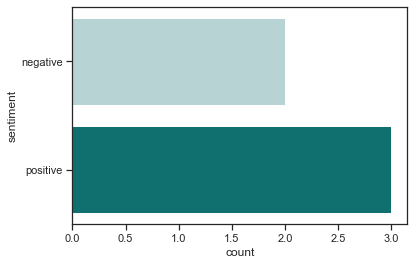

In [306]:
# Number of tweets 
sns.countplot(y='sentiment', 
             data=df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

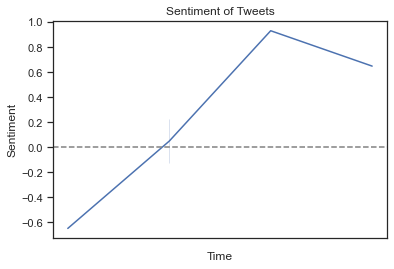

In [307]:
# Lineplot
g = sns.lineplot(x='created_at', y='compound', data=df)

g.set(xticklabels=[]) 
g.set(title='Sentiment of Tweets')
g.set(xlabel="Time")
g.set(ylabel="Sentiment")
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey');

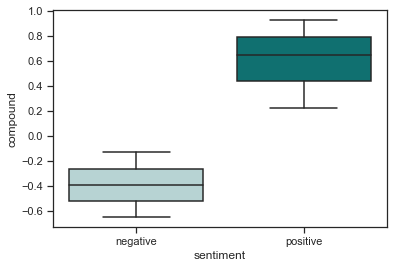

In [308]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);

Literature:

[Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for
Sentiment Analysis of Social Media Text. Eighth International Conference on
Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.](https://ojs.aaai.org/index.php/ICWSM/article/view/14550)